<h2> Task 1 analysis </h2>


<h3> first subject </h3>    

In [190]:
import pandas

#load lg file 1 with no header
df = pandas.read_csv('task1 s1.csv', header = None)

In [191]:
print(df)

                                                    0           1       2  \
0             Andrew doesn't speak English or German.  condition:      SD   
1              John likes both espresso and biscotti.  condition:  filler   
2            We did not close the door or the window.  condition:      SD   
3   It is not true that Andrew speaks English and ...  condition:      HC   
4          The road wasn't very wide or easy to find.  condition:      SD   
5   It is not true that the road was very wide and...  condition:      HC   
6   It is not true that Andrew speaks English or G...  condition:      HD   
7                   Andrew speaks German and English.  condition:  filler   
8             John doesn't like espresso or biscotti.  condition:      SD   
9            We didn't close the door and the window.  condition:      SC   
10  It is not true that Pat entered the room and s...  condition:      HC   
11  It is not true that we closed the door and the...  condition:      HC   

In [192]:
#change column names
df.columns = ['sentence', '', 'type', '', 'score']
print(df.columns)

Index(['sentence', '', 'type', '', 'score'], dtype='object')


In [193]:
print(df)

                                             sentence                type  \
0             Andrew doesn't speak English or German.  condition:      SD   
1              John likes both espresso and biscotti.  condition:  filler   
2            We did not close the door or the window.  condition:      SD   
3   It is not true that Andrew speaks English and ...  condition:      HC   
4          The road wasn't very wide or easy to find.  condition:      SD   
5   It is not true that the road was very wide and...  condition:      HC   
6   It is not true that Andrew speaks English or G...  condition:      HD   
7                   Andrew speaks German and English.  condition:  filler   
8             John doesn't like espresso or biscotti.  condition:      SD   
9            We didn't close the door and the window.  condition:      SC   
10  It is not true that Pat entered the room and s...  condition:      HC   
11  It is not true that we closed the door and the...  condition:      HC   

In [194]:
#get rid of unnecessary columns
df1 = df.iloc[:, [2,4]]
print(df1)

      type  score
0       SD      5
1   filler      5
2       SD      5
3       HC      2
4       SD      4
5       HC      2
6       HD      4
7   filler      5
8       SD      5
9       SC      2
10      HC      2
11      HC      3
12      SC      2
13  filler      5
14  filler      5
15      HD      4
16      HD      4
17      SC      2
18      HD      4
19      HC      2
20      SC      1
21      SD      4
22  filler      5
23      SC      2
24      HD      4


<h5> Experimental conditions </h5>
    
__sd__: ambiguous relative scope assignment between negation and disjunction <br>
__sc__: ambiguous relative scope assignment between negation and conjunction <br>
__hd__: unambiguous relative scope assignment between negation and disjunction <br>
__hc__: unambiguous relative scope assignmnt between negation and conjunction <br>
__filler__: filler items <br>


In [195]:

#subgrouping by condition
df_sd = df1.loc[df1.loc[:, 'type'] == 'SD', :]
#print(df_sd.head())

df_sc = df1.loc[df1.loc[:, 'type'] == 'SC', :]
df_hd = df1.loc[df1.loc[:, 'type'] == 'HD', :]
df_hc = df1.loc[df1.loc[:, 'type'] == 'HC', :]
df_filler = df1.loc[df1.loc[:, 'type'] == 'filler', :]

#subgrouping by sentence type
df_amb = df1.loc[(df1.loc[:, 'type'] == 'SC') ^ (df1.loc[:, 'type'] == 'SD'), :]  
df_unamb = df1.loc[(df1.loc[:, 'type'] == 'HC') ^ (df1.loc[:, 'type'] == 'HD'), :]  

In [196]:
import numpy as np
#mean score in each condition
score_mean = [np.mean(df_sd.loc[:, 'score']), np.mean(df_sc.loc[:, 'score']), np.mean(df_hd.loc[:, 'score']), 
             np.mean(df_hc.loc[:, 'score']), np.mean(df_filler.loc[:, 'score'])]
print(score_mean)

#mean score in each sentence type
score_mean1 = [np.mean(df_amb.loc[:, 'score']), np.mean(df_unamb.loc[:, 'score'])]
print(score_mean1)

[4.6, 1.8, 4.0, 2.2, 5.0]
[3.2, 3.1]


In [197]:
#std in each condition
score_std = [np.std(df_sd.loc[:, 'score']), np.std(df_sc.loc[:, 'score']), np.std(df_hd.loc[:, 'score']), 
             np.std(df_hc.loc[:, 'score']), np.std(df_filler.loc[:, 'score'])]
print(score_std)

#std in each sentence type
score_std1 = [np.std(df_amb.loc[:, 'score']), np.std(df_unamb.loc[:, 'score'])]
print(score_std1)

[0.4898979485566356, 0.4, 0.0, 0.39999999999999997, 0.0]
[1.469693845669907, 0.9433981132056604]


In [198]:
import scipy.stats as stats
# do a t-test indpendent two-sample, two-tailed between sd and sc
t, p = stats.ttest_ind(df_sd.loc[:, 'score'], df_sc.loc[:, 'score'])
print(t)
print(p)


8.854377448471462
2.0889005660470772e-05


In [199]:
# t-test between hd and hc
t, p = stats.ttest_ind(df_hd.loc[:, 'score'], df_hc.loc[:, 'score'])
print(t)
print(p)

8.999999999999998
1.8531184296430133e-05


In [200]:
#t-test between sc and hc
t, p = stats.ttest_ind(df_sc.loc[:, 'score'], df_hc.loc[:, 'score'])
print(t)
print(p)

-1.4142135623730954
0.1950155281000756


In [201]:
#t-test between sentence type
t, p = stats.ttest_ind(df_amb.loc[:,'score'], df_unamb.loc[:, 'score'])
print(t)
print(p)

0.17177950029416061
0.8655273807150274


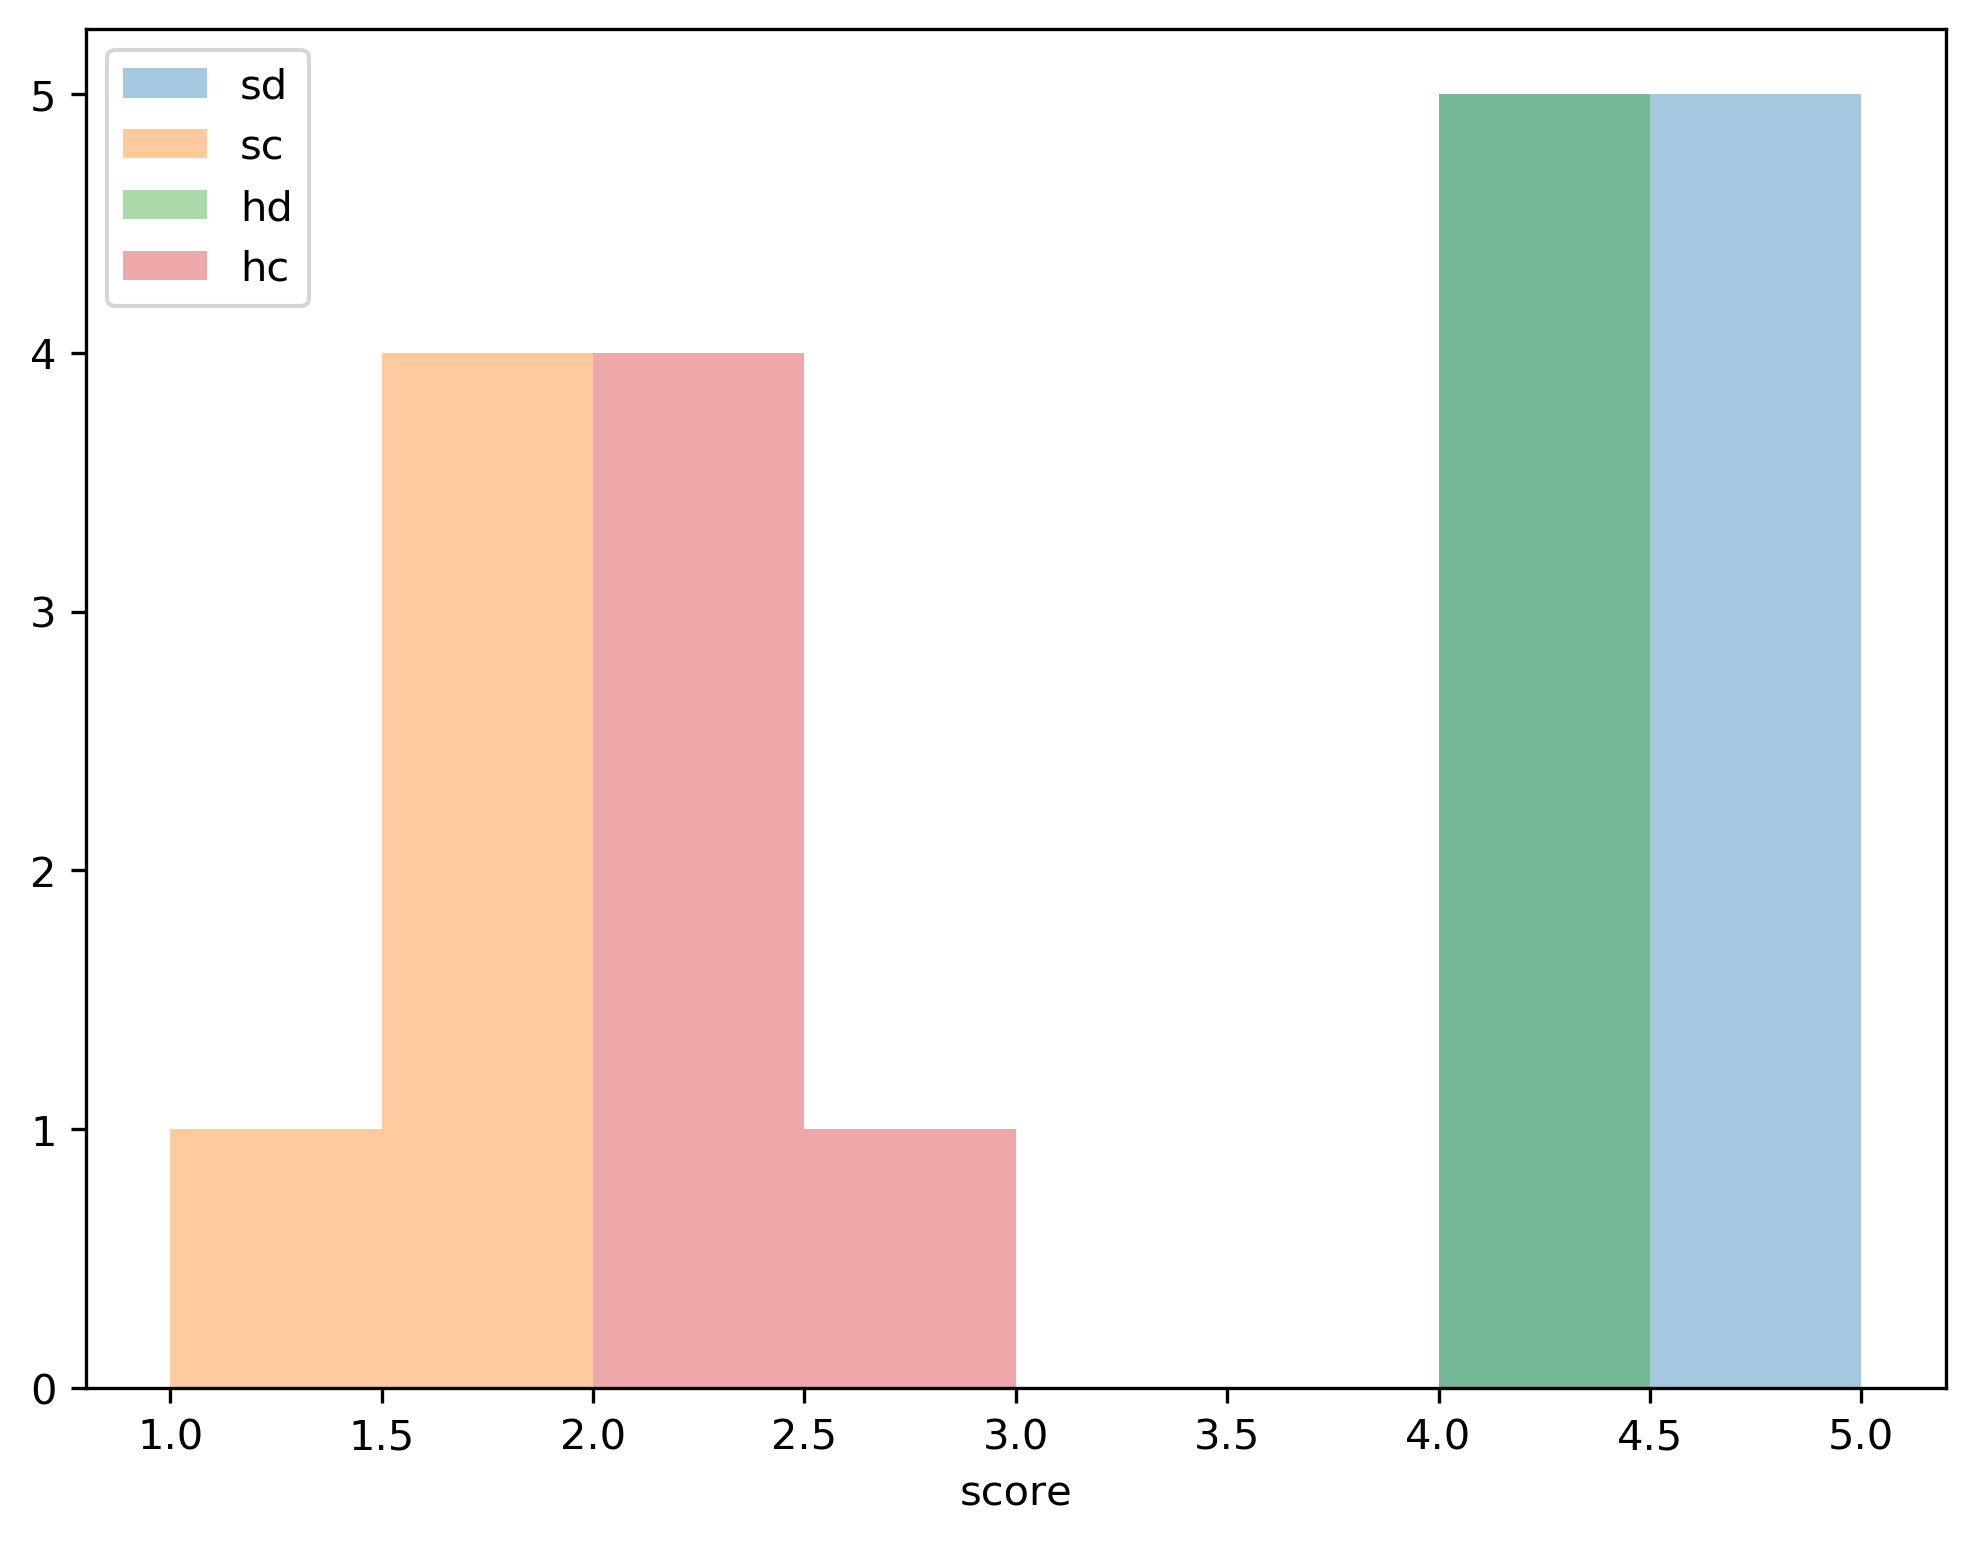

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8, 6), dpi = 300)

sns.distplot(df_sd.loc[:, 'score'], kde = False, label = 'sd')
sns.distplot(df_sc.loc[:, 'score'], kde = False, label = 'sc')
sns.distplot(df_hd.loc[:, 'score'], kde = False, label = 'hd')
sns.distplot(df_hc.loc[:, 'score'], kde = False, label = 'hc')
plt.legend()
plt.show()

<h3> Subject-level analysis function </h3>

In [203]:
def SubjectStats(fileName):
    #read log file
    df = pandas.read_csv(fileName, header = None)
    
    #give column names
    df.columns = ['sentence', '', 'type', '', 'score']
    
    #get useful columns
    df1 = df.iloc[:, [2,4]]
     
    #sliving rows    
    df_sd = df1.loc[df1.loc[:, 'type'] == 'SD', :]
    df_sc = df1.loc[df1.loc[:, 'type'] == 'SC', :]
    df_hd = df1.loc[df1.loc[:, 'type'] == 'HD', :]
    df_hc = df1.loc[df1.loc[:, 'type'] == 'HC', :]

    #return value
    mean_sd = np.mean(df_sd.loc[:, 'score'])
    mean_sc = np.mean(df_sc.loc[:, 'score'])
    mean_hc = np.mean(df_hc.loc[:, 'score'])
    mean_hd = np.mean(df_hd.loc[:, 'score'])
    
    sns.distplot(df_sd.loc[:, 'score'], kde = True, label = 'sd') #show both curve and histogram
    sns.distplot(df_sc.loc[:, 'score'], kde = True, label = 'sc')
    sns.distplot(df_hd.loc[:, 'score'], kde = True, label = 'hd')
    sns.distplot(df_hc.loc[:, 'score'], kde = True, label = 'hc')
    plt.legend()
    plt.show()
    
    return mean_sd, mean_sc, mean_hd, mean_hc

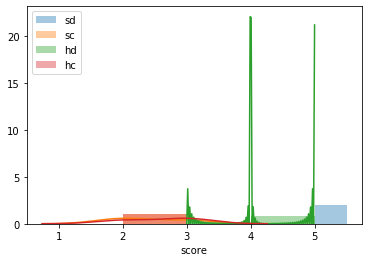

(5.0, 2.4, 4.0, 2.6)

In [204]:
SubjectStats('task1 s5.csv')

<h3> Group data </h3>

In [205]:
#create group data
data = {'type':[], 'score': []}
dfGroup = pandas.DataFrame(data = data)

for i in range(1, 5):
        fileName = 'task1 s' + str(i) + '.csv'
        
        def Subjects(fileName):
            df=pandas.read_csv(fileName, header = None)
        
            df.columns = ['sentence', '', 'type', '', 'score']
            df1 = df.iloc[:, [2,4]]
            return df1
        dfGroup=dfGroup.append(df1)
dfGroup.to_csv('GroupData.csv')

#slice data
df_sd = dfGroup.loc[dfGroup.loc[:, 'type'] == 'SD', :]
df_sc = dfGroup.loc[dfGroup.loc[:, 'type'] == 'SC', :]
df_hd = dfGroup.loc[dfGroup.loc[:, 'type'] == 'HD', :]
df_hc = dfGroup.loc[dfGroup.loc[:, 'type'] == 'HC', :] 

df_amb = dfGroup.loc[(dfGroup.loc[:, 'type'] == 'SC') ^ (dfGroup.loc[:, 'type'] == 'SD'), :]  
df_unamb = dfGroup.loc[(dfGroup.loc[:, 'type'] == 'HC') ^ (dfGroup.loc[:, 'type'] == 'HD'), :]            

In [206]:
# mean score for each condition
score_mean = [np.mean(df_sd.loc[:, 'score']), np.mean(df_sc.loc[:, 'score']), np.mean(df_hd.loc[:, 'score']), 
             np.mean(df_hc.loc[:, 'score']), np.mean(df_filler.loc[:, 'score'])]
print(score_mean)

#mean score in each sentence type
score_mean1 = [np.mean(df_amb.loc[:, 'score']), np.mean(df_unamb.loc[:, 'score'])]
print(score_mean1)

[4.6, 1.8, 4.0, 2.2, 5.0]
[3.2, 3.1]


In [207]:
#std in each condition
score_std = [np.std(df_sd.loc[:, 'score']), np.std(df_sc.loc[:, 'score']), np.std(df_hd.loc[:, 'score']), 
             np.std(df_hc.loc[:, 'score']), np.std(df_filler.loc[:, 'score'])]
print(score_std)

#std in each sentence type
score_std1 = [np.std(df_amb.loc[:, 'score']), np.std(df_unamb.loc[:, 'score'])]
print(score_std1)

[0.48989794855663554, 0.4, 0.0, 0.39999999999999997, 0.0]
[1.4696938456699067, 0.9433981132056605]


In [208]:
# do a t-test indpendent two-sample, two-tailed between sd and sc
t, p = stats.ttest_ind(df_sd.loc[:, 'score'], df_sc.loc[:, 'score'])
print(t)
print(p)

19.29766825292631
3.1198777102742035e-21


In [209]:
# t-test between hd and hc
t, p = stats.ttest_ind(df_hd.loc[:, 'score'], df_hc.loc[:, 'score'])
print(t)
print(p)

19.61504524593303
1.7736885165660893e-21


In [210]:
#t-test between sc and hc
t, p = stats.ttest_ind(df_sc.loc[:, 'score'], df_hc.loc[:, 'score'])
print(t)
print(p)

-3.082207001484489
0.0038131888804641134


In [211]:
#t-test between sentence type
t, p = stats.ttest_ind(df_amb.loc[:,'score'], df_unamb.loc[:, 'score'])
print(t)
print(p)

0.3575875451676367
0.7216177810423945


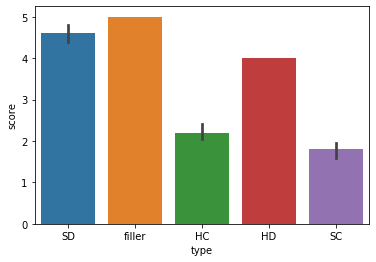

In [212]:
sns.barplot(data=dfGroup, x='type', y='score')
plt.show()


<h2> Task 2 analysis </h2>

In [213]:
df2 = pandas.read_csv('task2 s1.csv', header = None)

df2.columns = ['', 'animal', '', 'award', '', 'sentence', '', 'response', '']

df2=df2.iloc[:, [3,5,7]]
print(df2.head())



   award  sentence  response
0      0         1         0
1      1         0        -1
2      2         2        -1
3      1         2        -1
4      0         0         1


__none__: award = 0 <br> 
__both__: award = 1 <br>
__either__: award = 2 <br>

__not or__: sentence = 0 <br>
__not and__: sentence = 1 <br>
__both__: sentence = 2 <br>
__one of__: sentence = 3 <br>

In [217]:
df2.loc[df2.award == 1, ['award']] = 'both'
df2.loc[df2.award == 0, ['award']] = 'none'
df2.loc[df2.award == 2, ['award']] = 'either'

df2.loc[df2.sentence == 0, ['sentence']] = 'not or'
df2.loc[df2.sentence == 1, ['sentence']] = 'not and'
df2.loc[df2.sentence == 2, ['sentence']]= 'both'
df2.loc[df2.sentence == 3, ['sentence']] = 'one of'

print(df2.head())

    award sentence  response
0    none  not and         0
1    both   not or        -1
2  either     both        -1
3    both     both        -1
4    none   not or         1
